# Gradient Boosting and GridSearch


## The Data

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/mushroom.jpg" width="400" height="400">

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Imports

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Data Prep

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

## Train Test Split 

X_train.shape=(6905, 95)
X_test.shape=(1219, 95)
y_train.shape=(6905,)
y_test.shape=(1219,)


## Gradient Boosting and Grid Search with CV

{'n_estimators': [1, 5, 10, 20, 40, 100], 'max_depth': [3, 4, 5, 6]}

GradientBoostingClassifier()

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

### Fit to Training Data with CV Search

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

{'max_depth': 3, 'n_estimators': 100}

## Performance 

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



array([2.91150176e-04, 2.79096329e-16, 0.00000000e+00, 0.00000000e+00,
       2.78759642e-17, 1.04652037e-03, 2.63566012e-17, 3.78276239e-06,
       0.00000000e+00, 0.00000000e+00, 4.52707838e-17, 0.00000000e+00,
       6.30971446e-17, 0.00000000e+00, 0.00000000e+00, 1.73987343e-06,
       2.31053911e-03, 5.26538421e-02, 1.84253604e-04, 1.38461678e-02,
       1.82499853e-02, 2.07125621e-03, 6.14744334e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25279461e-02,
       1.09449796e-02, 0.00000000e+00, 3.08636779e-16, 6.99063856e-18,
       6.21179828e-18, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.40978438e-18, 0.00000000e+00, 1.66234456e-17, 2.16669482e-17,
       3.03922836e-04, 4.13835786e-04, 1.36013500e-01, 7.71855052e-03,
       3.04759120e-02, 6.21308869e-04, 2.61407718e-04, 4.95063766e-06,
       3.60117275e-05, 7.74443653e-05, 3.56205408e-02, 4.24676199e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

array([2.91150176e-04, 2.79096329e-16, 0.00000000e+00, 0.00000000e+00,
       2.78759642e-17, 1.04652037e-03, 2.63566012e-17, 3.78276239e-06,
       0.00000000e+00, 0.00000000e+00, 4.52707838e-17, 0.00000000e+00,
       6.30971446e-17, 0.00000000e+00, 0.00000000e+00, 1.73987343e-06,
       2.31053911e-03, 5.26538421e-02, 1.84253604e-04, 1.38461678e-02,
       1.82499853e-02, 2.07125621e-03, 6.14744334e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25279461e-02,
       1.09449796e-02, 0.00000000e+00, 3.08636779e-16, 6.99063856e-18,
       6.21179828e-18, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.40978438e-18, 0.00000000e+00, 1.66234456e-17, 2.16669482e-17,
       3.03922836e-04, 4.13835786e-04, 1.36013500e-01, 7.71855052e-03,
       3.04759120e-02, 6.21308869e-04, 2.61407718e-04, 4.95063766e-06,
       3.60117275e-05, 7.74443653e-05, 3.56205408e-02, 4.24676199e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,2.790963e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,2.787596e-17
...,...
habitat_l,0.000000e+00
habitat_m,1.925644e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


,Importance
odor_n,0.614744
stalk-root_c,0.136013
bruises_t,0.052654
stalk-surface-below-ring_y,0.035621
spore-print-color_r,0.030495
...,...
stalk-color-below-ring_p,0.000000
odor_y,0.000000
odor_s,0.000000
veil-color_o,0.000000


,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064641,0.0,0.0,3.086368e-16,0.000518,0.614744


,Importance
stalk-surface-above-ring_k,0.000621
ring-number_o,0.000768
odor_p,0.000921
cap-surface_g,0.001047
ring-type_p,0.001867
odor_m,0.002071
cap-color_y,0.002311
population_c,0.002687
stalk-color-below-ring_y,0.003134
ring-type_n,0.003256


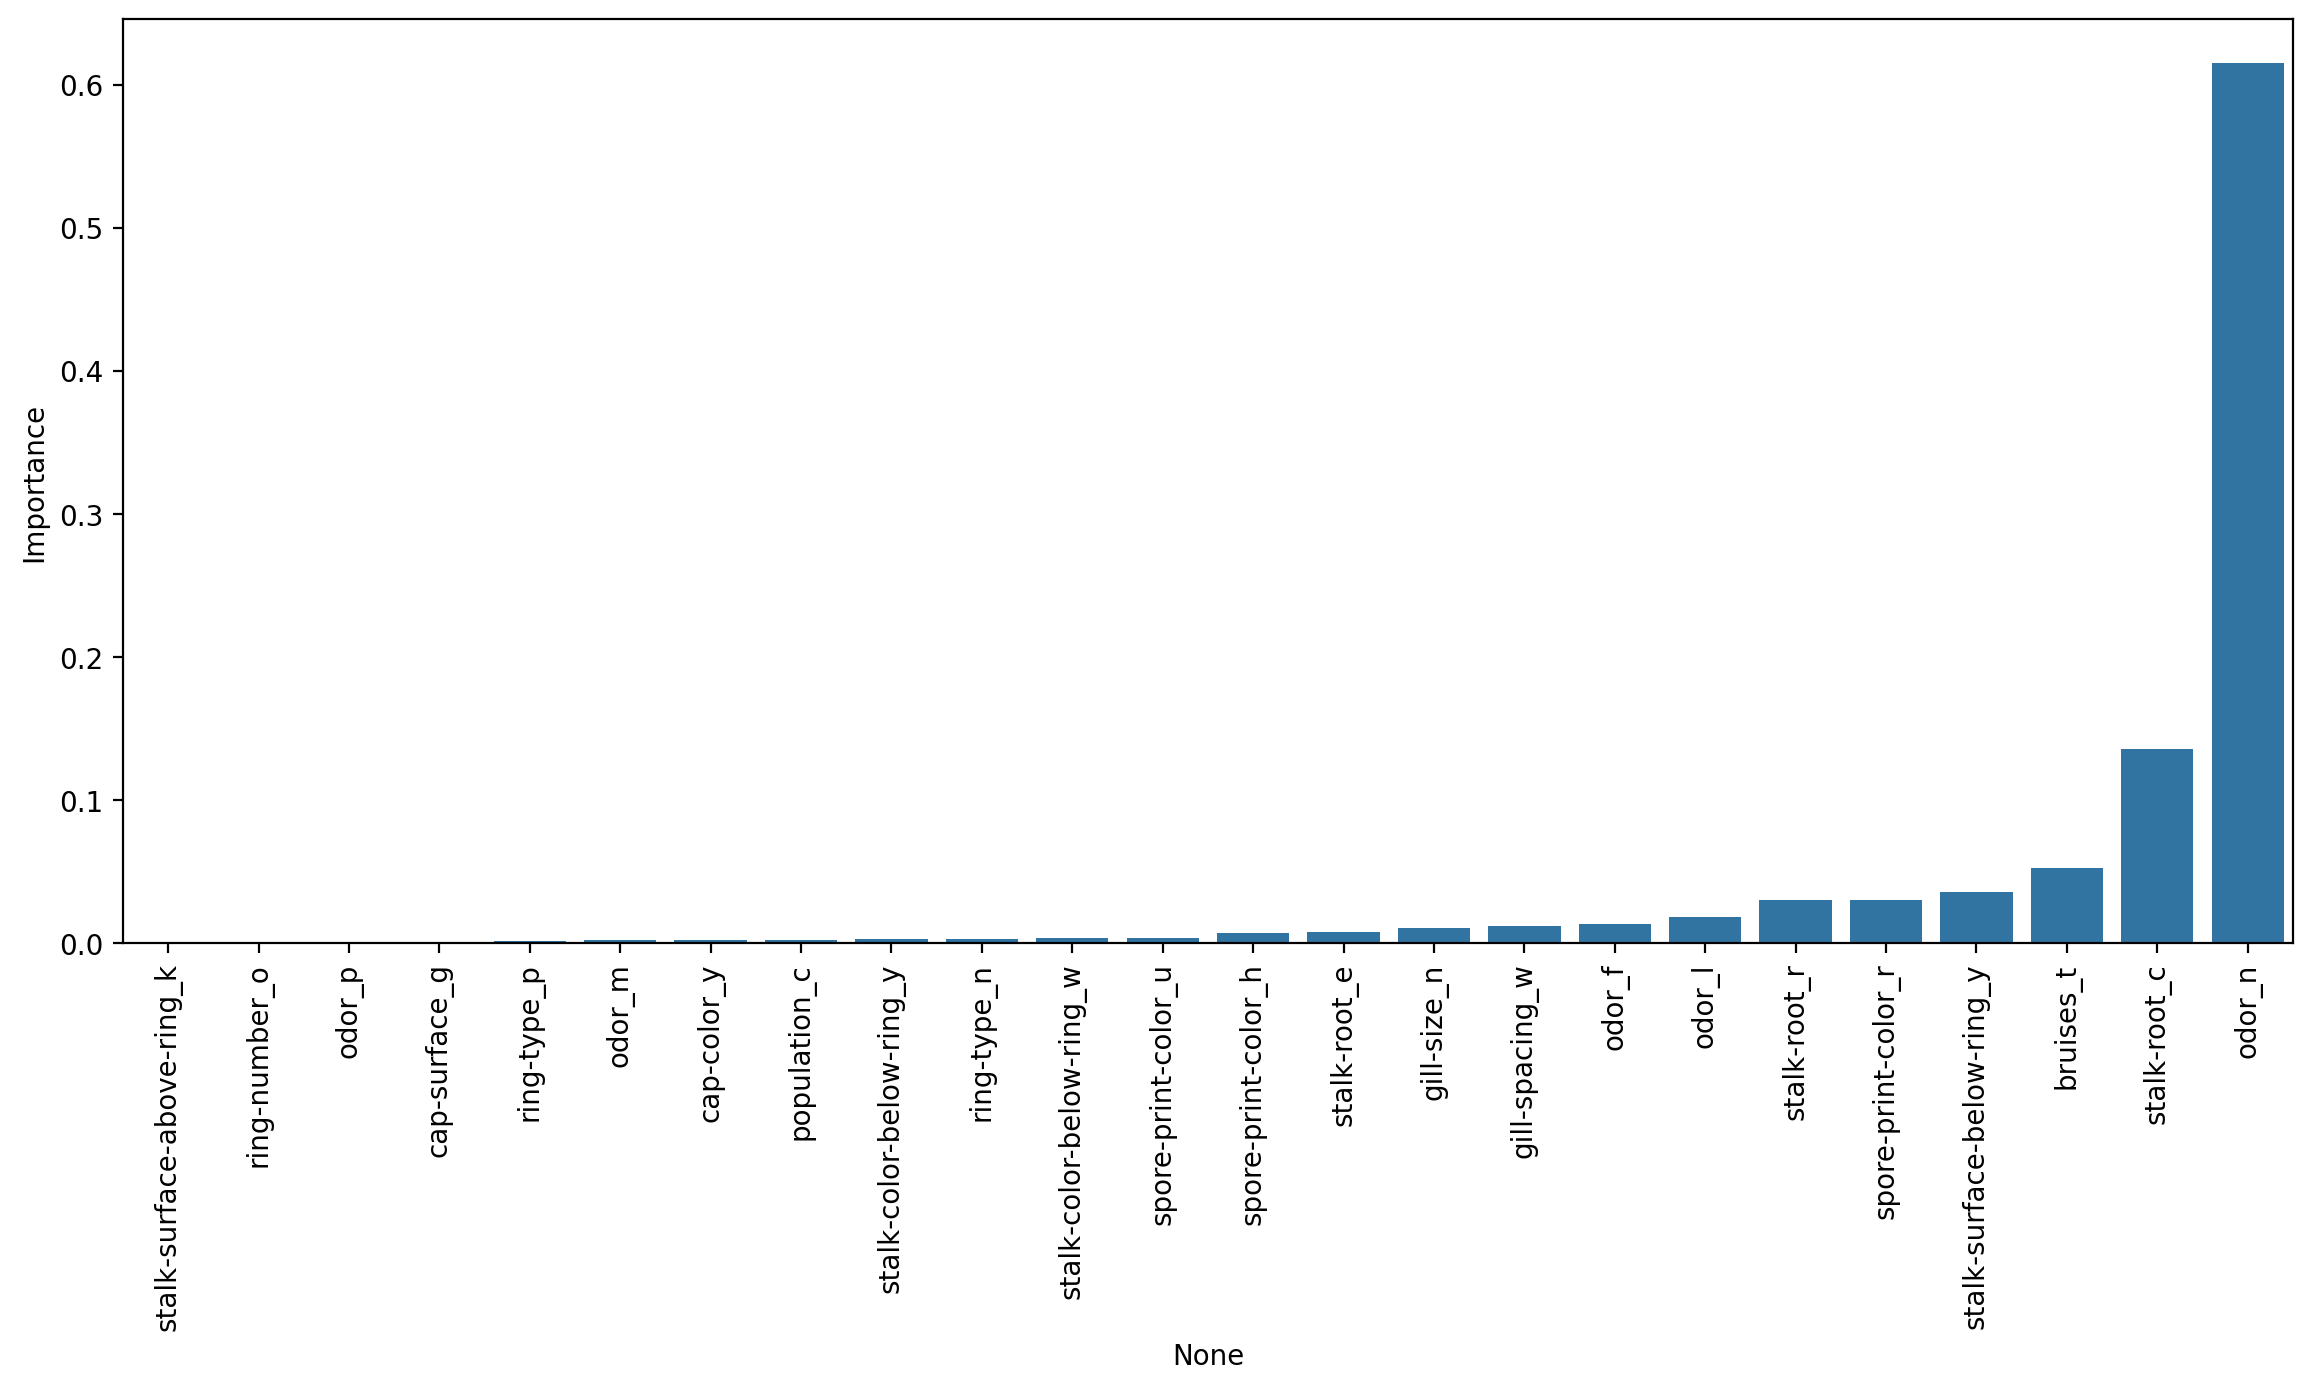